## Digital Marketing Strategy

In this Python file we investigate which factors drive consumers engagement with brand post popularity with U.S. theme parc posts on Facebook

In [81]:
# Import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import shapiro, levene
from scipy.stats import kruskal


In [19]:
# Define the absolute paths to your CSV files
csv_path_1 = "/content/Digital-Marketing-Strategy2/Themeparcs I.csv"
csv_path_2 = "/content/Digital-Marketing-Strategy2/Themeparcs II.csv"
csv_path_3 = "/content/Digital-Marketing-Strategy2/Themeparcs III.csv"
csv_path_4 = "/content/Digital-Marketing-Strategy2/Themeparcs IV.csv"

# Read the CSV files
themepark_1 = pd.read_csv(csv_path_1, sep=';', on_bad_lines='skip')
themepark_2 = pd.read_csv(csv_path_2, sep=';', on_bad_lines='skip')
themepark_3 = pd.read_csv(csv_path_3, sep=';', on_bad_lines='skip')
themepark_4 = pd.read_csv(csv_path_4, sep=';', on_bad_lines='skip')

## 1. Exploratoy Data Analysis (EDA) & Data Cleaning

1.1 Check shape of `themepark_1`, `themepark_2`, `themepark_3` & `themepark_4`

In [20]:
themepark_1.shape

(5000, 18)

In [21]:
themepark_2.shape

(5000, 18)

In [22]:
themepark_3.shape

(5000, 18)

In [23]:
themepark_4.shape

(443, 18)

In [24]:
# Amount of total rows for each df
5000+5000+5000+443

15443

1.2 Check features of `themepark_1`, `themepark_2`, `themepark_3` & `themepark_4`

In [25]:
themepark_1.dtypes

Date                             object
Profile                          object
Message                          object
Number of Reactions             float64
Number of Shares                float64
Number of Comments (primary)    float64
Number of Shares.1              float64
Comments per post               float64
Comments on posts by fans       float64
Post interaction rate            object
Engagement                       object
Number of Likes                 float64
Link-posts                      float64
Picture Posts                   float64
Video-posts                     float64
Profile-ID                       object
Post-ID                          object
Link                             object
dtype: object

In [26]:
themepark_2.dtypes

Date                             object
Profile                          object
Message                          object
Number of Reactions             float64
Number of Shares                float64
Number of Comments (primary)    float64
Number of Shares.1              float64
Comments per post               float64
Comments on posts by fans       float64
Post interaction rate            object
Engagement                       object
Number of Likes                 float64
Link-posts                      float64
Picture Posts                   float64
Video-posts                     float64
Profile-ID                       object
Post-ID                          object
Link                             object
dtype: object

In [27]:
themepark_3.dtypes

Date                             object
Profile                          object
Message                          object
Number of Reactions             float64
Number of Shares                float64
Number of Comments (primary)    float64
Number of Shares.1              float64
Comments per post               float64
Comments on posts by fans       float64
Post interaction rate            object
Engagement                       object
Number of Likes                 float64
Link-posts                      float64
Picture Posts                   float64
Video-posts                     float64
Profile-ID                       object
Post-ID                          object
Link                             object
dtype: object

In [28]:
themepark_4.dtypes

Date                             object
Profile                          object
Message                          object
Number of Reactions             float64
Number of Shares                float64
Number of Comments (primary)    float64
Number of Shares.1              float64
Comments per post               float64
Comments on posts by fans       float64
Post interaction rate            object
Engagement                       object
Number of Likes                 float64
Link-posts                      float64
Picture Posts                   float64
Video-posts                     float64
Profile-ID                       object
Post-ID                          object
Link                             object
dtype: object

1.3 Merge `themepark_1`, `themepark_2`, `themepark_3` & `themepark_4` since each DataFrame consists of the same features

In [29]:
# Show the first couple of rows of the first csv file
# themepark_1.head()

In [30]:
# Merge the DataFrames
merged_themepark = pd.concat([themepark_1, themepark_2, themepark_3, themepark_4], ignore_index=True)

# If you want to save the merged DataFrame to a new CSV file
# merged_themepark.to_csv("Merged_Themeparks.csv", index=False)

In [31]:
# merged_themepark.to_csv

In [32]:
# Split the single column into multiple columns using the semicolon delimiter
# split_data = merged_themepark[merged_themepark.columns[0]].str.split(';', expand=True)

In [33]:
# Assign the new DataFrame columns to the correct names
# Replace these names with the actual column names you expect based on your data
# column_names = ['Date', 'Profile', 'Message', 'Number of Reactions', 'Number of Shares',
#                'Number of Comments (primary)', 'Number of Shares', 'Comments per post',
#                'Comments on posts by fans', 'Post interaction rate', 'Engagement',
#                'Number of Likes', 'Link-posts', 'Picture Posts', 'Video-posts',
#                'Profile-ID', 'Post-ID', 'Link']

In [34]:
# Ensure the number of column names matches the number of columns in 'split_data'
# if len(column_names) == split_data.shape[1]:
#    split_data.columns = column_names
# else:
#    print("The number of provided column names does not match the number of columns in the data.")

In [35]:
merged_themepark.describe()

,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Number of Likes,Link-posts,Picture Posts,Video-posts
count,15443.000000,0.0,15443.000000,15443.000000,15443.000000,15443.000000,15443.000000,555.0,11562.0,2479.0
mean,494.282911,NaN,34.199702,62.078288,52.954737,52.954737,355.763453,1.0,1.0,1.0
std,3717.067171,NaN,182.409237,507.937148,265.913045,265.913045,2509.935344,0.0,0.0,0.0
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0
25%,22.000000,NaN,1.000000,2.000000,1.000000,1.000000,19.000000,1.0,1.0,1.0
50%,67.000000,NaN,6.000000,6.000000,8.000000,8.000000,55.000000,1.0,1.0,1.0
75%,217.000000,NaN,18.000000,21.000000,27.000000,27.000000,177.000000,1.0,1.0,1.0
max,210756.000000,NaN,8379.000000,30762.000000,11170.000000,11170.000000,124591.000000,1.0,1.0,1.0



- Number of Reactions: A count of all reactions (likes, loves, etc.) to the posts.
- Number of Shares: The count of times the posts have been shared. This column seems to have an issue as it shows all zeros or may missing data.
- Number of Comments (primary): The total number of primary comments made on the posts.
- Number of Shares.1: Appears to be a duplicate or corrected column for the number of shares with actual non-zero data.
- Comments per post: An average of how many comments were made per post.
- Comments on posts by fans: The total number of comments made by fans on the posts.
- Number of Likes: A count of likes specifically, as opposed to all reactions.
- Link-posts: The number of posts that contain links.
- Picture Posts: The number of posts that contain pictures.
- Video-posts: The number of posts that contain videos.

In [36]:
merged_themepark.shape

(15443, 18)

In [37]:
# Print the first rows
merged_themepark.head()

,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,NaN,2.0,2.0,2.0,2.0,"1,09E+12","1,09E+12",13.0,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,NaN,1.0,2.0,1.0,1.0,"4,17E+11","4,17E+11",33.0,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,NaN,2.0,3.0,2.0,2.0,"2,85E+11","2,85E+11",21.0,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,NaN,52.0,12.0,56.0,56.0,"1,36E+11","1,36E+11",478.0,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,NaN,2.0,0.0,2.0,2.0,"4,96E+11","4,96E+11",16.0,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


- Date: The date and time when the post was made
- Profile: The name of the page or profile that made the post
- Message: The content or message of the post
- Number of Reactions: The total count of reactions (like, love, haha, etc.) received by the post
- Number of Shares: The total number of times the post has been shared
- Number of Comments (primary): The initial number of comments on the post
- Comments per post: The average number of comments per post
- Comments on posts by fans: The number of comments made by fans on the posts
- Post interaction: Interaction count for the post, which might include reactions, comments, and shares
- Engagement rate: A metric that shows the level of engagement users have with the post
- Number of Likes: The number of 'like' reactions to the post
- Link-posts: If the post includes a link, this might indicate the presence of it
- Picture Posts: Indicates if the post contains a picture
- Video-posts: Indicates if the post includes a video
- Profile-ID: A unique identifier for the profile or page that made the post
- Post-ID: A unique identifier for the post itself
- Link: A URL to the post on the platform it was published


In [38]:
# Check for missing values
merged_themepark.isnull().sum()

Date                                0
Profile                             0
Message                             0
Number of Reactions                 0
Number of Shares                15443
Number of Comments (primary)        0
Number of Shares.1                  0
Comments per post                   0
Comments on posts by fans           0
Post interaction rate               0
Engagement                          0
Number of Likes                     0
Link-posts                      14888
Picture Posts                    3881
Video-posts                     12964
Profile-ID                          0
Post-ID                             0
Link                                0
dtype: int64

The only missing values in the dataset are in the Number of Shares, Link, Picture, and Video-posts columns.

Link, Picture, and Video-posts columns, which represent whether a post contains a link, video, or picture, subsequently represented by 1.0. Nan values in this sence suppose to represent a 0, which means that the post does not contain a link, video, or picture. However, NaN vanlues are not comutable, therefore will be replaced by 0.0 values, which are computable.

Number of Shares NaNs does not provide us with any information. Moreover, Number of shares column will be removed later in the process of cleaning, as there are two Number of shares columns.

Given that, NaN's can be replaced with 0's

In [39]:
# Replace missing values with 0.0
merged_themepark.fillna(0.0, inplace=True)

In [40]:
# Check for missing values
merged_themepark.isnull().sum()

Date                            0
Profile                         0
Message                         0
Number of Reactions             0
Number of Shares                0
Number of Comments (primary)    0
Number of Shares.1              0
Comments per post               0
Comments on posts by fans       0
Post interaction rate           0
Engagement                      0
Number of Likes                 0
Link-posts                      0
Picture Posts                   0
Video-posts                     0
Profile-ID                      0
Post-ID                         0
Link                            0
dtype: int64

In [41]:
# Print the first rows
merged_themepark.head()

,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,"1,09E+12","1,09E+12",13.0,0.0,1.0,0.0,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,"4,17E+11","4,17E+11",33.0,0.0,0.0,0.0,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,"2,85E+11","2,85E+11",21.0,0.0,0.0,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,"1,36E+11","1,36E+11",478.0,0.0,1.0,0.0,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,"4,96E+11","4,96E+11",16.0,0.0,0.0,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


In [42]:
# Print the first rows
merged_themepark.head()

,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,0.0,2.0,2.0,2.0,2.0,"1,09E+12","1,09E+12",13.0,0.0,1.0,0.0,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,0.0,1.0,2.0,1.0,1.0,"4,17E+11","4,17E+11",33.0,0.0,0.0,0.0,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,0.0,2.0,3.0,2.0,2.0,"2,85E+11","2,85E+11",21.0,0.0,0.0,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,0.0,52.0,12.0,56.0,56.0,"1,36E+11","1,36E+11",478.0,0.0,1.0,0.0,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,0.0,2.0,2.0,"4,96E+11","4,96E+11",16.0,0.0,0.0,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


There are two columns, referring to Number of Shares, let's examine what they consist of

In [43]:
# Display unique values in the "Number of Shares" column
unique_values_shares = merged_themepark['Number of Shares'].unique()
print("Unique values in 'Number of Shares' column:")
print(unique_values_shares)

# Display unique values in the "Number of Shares.1" column
unique_values_shares_1 = merged_themepark['Number of Shares.1'].unique()
print("\nUnique values in 'Number of Shares.1' column:")
print(unique_values_shares_1)

Unique values in 'Number of Shares' column:
[0.]

Unique values in 'Number of Shares.1' column:
[2.0000e+00 3.0000e+00 1.2000e+01 0.0000e+00 1.1000e+01 9.7000e+01
 1.4000e+01 1.5000e+01 5.0000e+00 9.0000e+01 3.8000e+01 1.0000e+00
 4.0000e+00 8.0000e+00 4.8000e+01 2.5000e+01 2.9000e+01 8.7000e+01
 9.0000e+00 2.1400e+02 3.6900e+02 1.6000e+01 1.7000e+01 9.5000e+01
 2.1000e+01 7.0000e+00 3.1000e+01 7.3000e+01 1.9000e+01 6.0000e+00
 1.3000e+01 2.3000e+01 3.5000e+01 4.9000e+01 2.7000e+01 1.5050e+03
 2.0000e+01 3.6000e+01 5.4000e+01 4.6000e+01 3.3000e+01 5.0000e+01
 1.0000e+01 2.8000e+01 1.0200e+02 2.2100e+02 5.7000e+01 9.3000e+01
 1.8000e+01 3.9000e+01 2.4000e+01 4.4000e+01 2.2000e+01 1.0500e+02
 5.6000e+01 2.8300e+02 1.6630e+03 2.6000e+01 3.0000e+01 7.6600e+02
 6.3000e+01 8.4000e+01 1.1300e+02 1.5630e+03 4.1000e+01 2.6500e+02
 4.7000e+02 8.0000e+01 3.4000e+01 5.4200e+02 4.2000e+01 6.1000e+01
 1.4000e+02 5.3000e+01 9.8000e+01 1.1400e+02 9.2000e+01 4.0400e+02
 1.7400e+02 4.7000e+01 2.4600e+02

The result suggests that in the "Number of Shares" column, there is only one unique value, which is 0.0. This means that all the values in this column are 0.0.

In the "Number of Shares.1" column, there are various unique values ranging from 0.0 to much larger numbers. This suggests that this column contains a wide range of numerical values, likely representing different quantities of shares for various posts.

Given that, we need to drop the "Number of Shares" column, and rename the "Number of Shares.1" to "Number of Shares"

In [44]:
# Drop the "Number of Shares" column
merged_themepark.drop(columns=["Number of Shares"], inplace=True)

# Rename the "Number of Shares.1" column to "Number of Shares"
merged_themepark.rename(columns={"Number of Shares.1": "Number of Shares"}, inplace=True)

In [45]:
# Print the first rows
merged_themepark.head()

,Date,Profile,Message,Number of Reactions,Number of Comments (primary),Number of Shares,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,2.0,2.0,2.0,2.0,"1,09E+12","1,09E+12",13.0,0.0,1.0,0.0,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,1.0,2.0,1.0,1.0,"4,17E+11","4,17E+11",33.0,0.0,0.0,0.0,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,2.0,3.0,2.0,2.0,"2,85E+11","2,85E+11",21.0,0.0,0.0,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,52.0,12.0,56.0,56.0,"1,36E+11","1,36E+11",478.0,0.0,1.0,0.0,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,2.0,0.0,2.0,2.0,"4,96E+11","4,96E+11",16.0,0.0,0.0,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


There is an interesting interplay between the 3 columns related to comments (Number of Comments (primary), Comments per post, Comments on posts by fans), which we examine below


In [46]:
correlation_matrix = merged_themepark[["Number of Comments (primary)", "Comments per post", "Comments on posts by fans"]].corr()
print(correlation_matrix)

                              Number of Comments (primary)  Comments per post  \
Number of Comments (primary)                      1.000000           0.955707   
Comments per post                                 0.955707           1.000000   
Comments on posts by fans                         0.955707           1.000000   

                              Comments on posts by fans  
Number of Comments (primary)                   0.955707  
Comments per post                              1.000000  
Comments on posts by fans                      1.000000  


The correlation analysis results show that all three columns ("Number of Comments (primary)", "Comments per post", and "Comments on posts by fans") are highly correlated with each other, with correlation coefficients close to 1. This suggests that they provide very similar information about comments on posts, indicating redundancy.

Regardless, the "Comments per post" column is chosen over "Number of Comments (primary)" and "Comments on posts by fans" due to its clarity, representing overall post engagement by comments. Since "Comments per post" and "Comments on posts by fans" have identical values, keeping "Comments per post" avoids redundancy while aligning with the research scope focused on overall engagement metrics.

In [47]:
columns_to_drop = [
    "Number of Comments (primary)",
    "Comments on posts by fans"
]

merged_themepark.drop(columns=columns_to_drop, inplace=True)

The conceptual model of our research consists of two levels:
Level 1: Posts level, requires the following columns: Date, Profile, Message, Number of Shares, Comments per post, Number of Likes, Link-posts, Picture Posts, Video-posts
Level 2: Theme parks level, requires information about the number of followers per profile, which will be manually imputed.

The rest of the columns:  Number of Reactions, Number of Comments (primary), Comments on posts by fans, Post interaction rate, Engagement, Profile-ID, Post-ID, Link are irrelevant to the scope of our research, therefore, can be dropped

In [48]:
# Print the first rows
merged_themepark.head()

,Date,Profile,Message,Number of Reactions,Number of Shares,Comments per post,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,2.0,2.0,"1,09E+12","1,09E+12",13.0,0.0,1.0,0.0,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,2.0,1.0,"4,17E+11","4,17E+11",33.0,0.0,0.0,0.0,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,3.0,2.0,"2,85E+11","2,85E+11",21.0,0.0,0.0,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,12.0,56.0,"1,36E+11","1,36E+11",478.0,0.0,1.0,0.0,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,"4,96E+11","4,96E+11",16.0,0.0,0.0,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


In [49]:
columns_to_drop = [
    "Number of Reactions",
    "Post interaction rate",
    "Engagement",
    "Profile-ID",
    "Post-ID",
    "Link"
]

merged_themepark.drop(columns=columns_to_drop, inplace=True)

In [50]:
# Print the first rows
merged_themepark.head()

,Date,Profile,Message,Number of Shares,Comments per post,Number of Likes,Link-posts,Picture Posts,Video-posts
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,2.0,2.0,13.0,0.0,1.0,0.0
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,2.0,1.0,33.0,0.0,0.0,0.0
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,3.0,2.0,21.0,0.0,0.0,1.0
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,12.0,56.0,478.0,0.0,1.0,0.0
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,0.0,2.0,16.0,0.0,0.0,1.0


In [51]:
#For the clarity of the column's meaning and coherency of the dataset, rename column Comments per post to Number of Comments
merged_themepark.rename(columns={"Comments per post": "Number of Comments"}, inplace=True)

In [52]:
# Print the first rows
merged_themepark.head()

,Date,Profile,Message,Number of Shares,Number of Comments,Number of Likes,Link-posts,Picture Posts,Video-posts
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,2.0,2.0,13.0,0.0,1.0,0.0
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,2.0,1.0,33.0,0.0,0.0,0.0
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,3.0,2.0,21.0,0.0,0.0,1.0
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,12.0,56.0,478.0,0.0,1.0,0.0
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,0.0,2.0,16.0,0.0,0.0,1.0


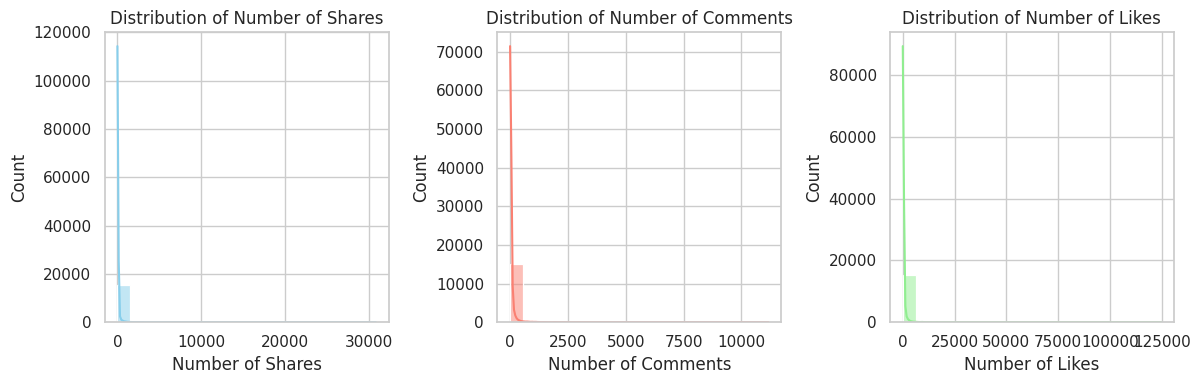

In [53]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plot distributions of numerical variables
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(data=merged_themepark, x='Number of Shares', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Number of Shares')

plt.subplot(1, 3, 2)
sns.histplot(data=merged_themepark, x='Number of Comments', bins=20, kde=True, color='salmon')
plt.title('Distribution of Number of Comments')

plt.subplot(1, 3, 3)
sns.histplot(data=merged_themepark, x='Number of Likes', bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Number of Likes')

plt.tight_layout()
plt.show()

1. **Distribution of Number of Shares**: Most of the data is clustered near 0, indicating that a large number of posts have a very low number of shares. There is a very steep drop-off as the number of shares increases, suggesting that posts with a high number of shares are quite rare in this dataset.

2. **Distribution of Number of Comments**: Similar to shares, the number of comments is also skewed towards the lower end. There's a peak at the beginning of the histogram, meaning that most posts have few comments, and very few posts have a large number of comments.

3. **Distribution of Number of Likes**: The distribution of likes follows the same trend as shares and comments. A majority of the posts have a low number of likes, with the count dropping significantly as the number of likes increases.

In summary, all three histograms exhibit a right-skewed distribution, which is typical for social media engagement metrics where most content receives little engagement, and a small fraction of content receives a lot.

<ipython-input-54-2da1f2985eab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_themepark, x='Link-posts', palette='pastel')
<ipython-input-54-2da1f2985eab>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_themepark, x='Picture Posts', palette='pastel')
<ipython-input-54-2da1f2985eab>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_themepark, x='Video-posts', palette='pastel')


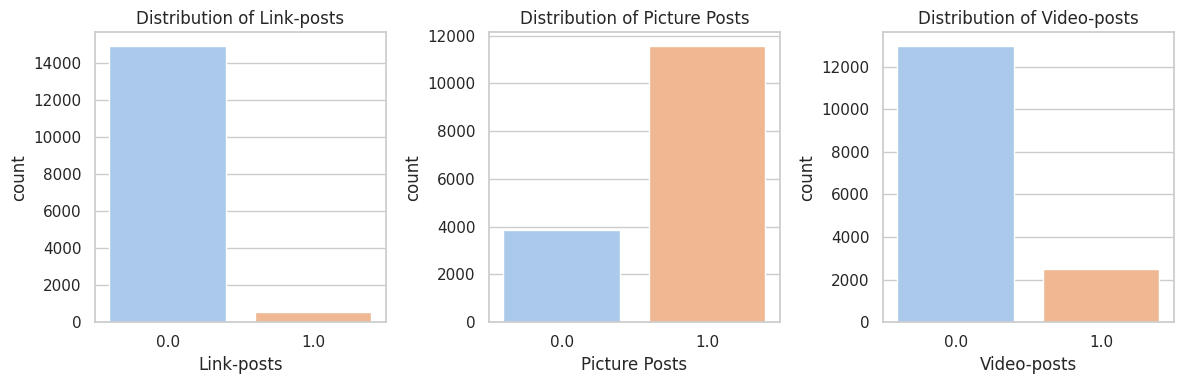

In [54]:
# Plot distributions of categorical variables
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.countplot(data=merged_themepark, x='Link-posts', palette='pastel')
plt.title('Distribution of Link-posts')

plt.subplot(1, 3, 2)
sns.countplot(data=merged_themepark, x='Picture Posts', palette='pastel')
plt.title('Distribution of Picture Posts')

plt.subplot(1, 3, 3)
sns.countplot(data=merged_themepark, x='Video-posts', palette='pastel')
plt.title('Distribution of Video-posts')

plt.tight_layout()
plt.show()

The image shows three bar graphs, each representing the distribution of different types of posts: link-posts, picture posts, and video-posts. Each bar graph has two bars, representing two categories which could likely be a binary classification such as '0' for 'no' and '1' for 'yes'. Here's what each graph indicates:

1. **Distribution of Link-posts**: The first bar graph shows a significant difference between the two categories. The bar for '0' is much higher than for '1', which suggests that there are many more posts without links compared to posts with links in the dataset.

2. **Distribution of Picture Posts**: The second bar graph shows the opposite trend to the first one. The bar for '1' is much higher than for '0', indicating that there are far more picture posts than posts without pictures.

3. **Distribution of Video-posts**: The third bar graph shows a similar distribution to the first graph. The bar for '0' is higher than for '1', indicating there are more posts without videos than with videos in this dataset.

Overall, the graphs tell us that in the dataset:
- Link-posts are less common than posts without links.
- Picture posts are more common than posts without pictures.
- Video-posts are less common than posts without videos.

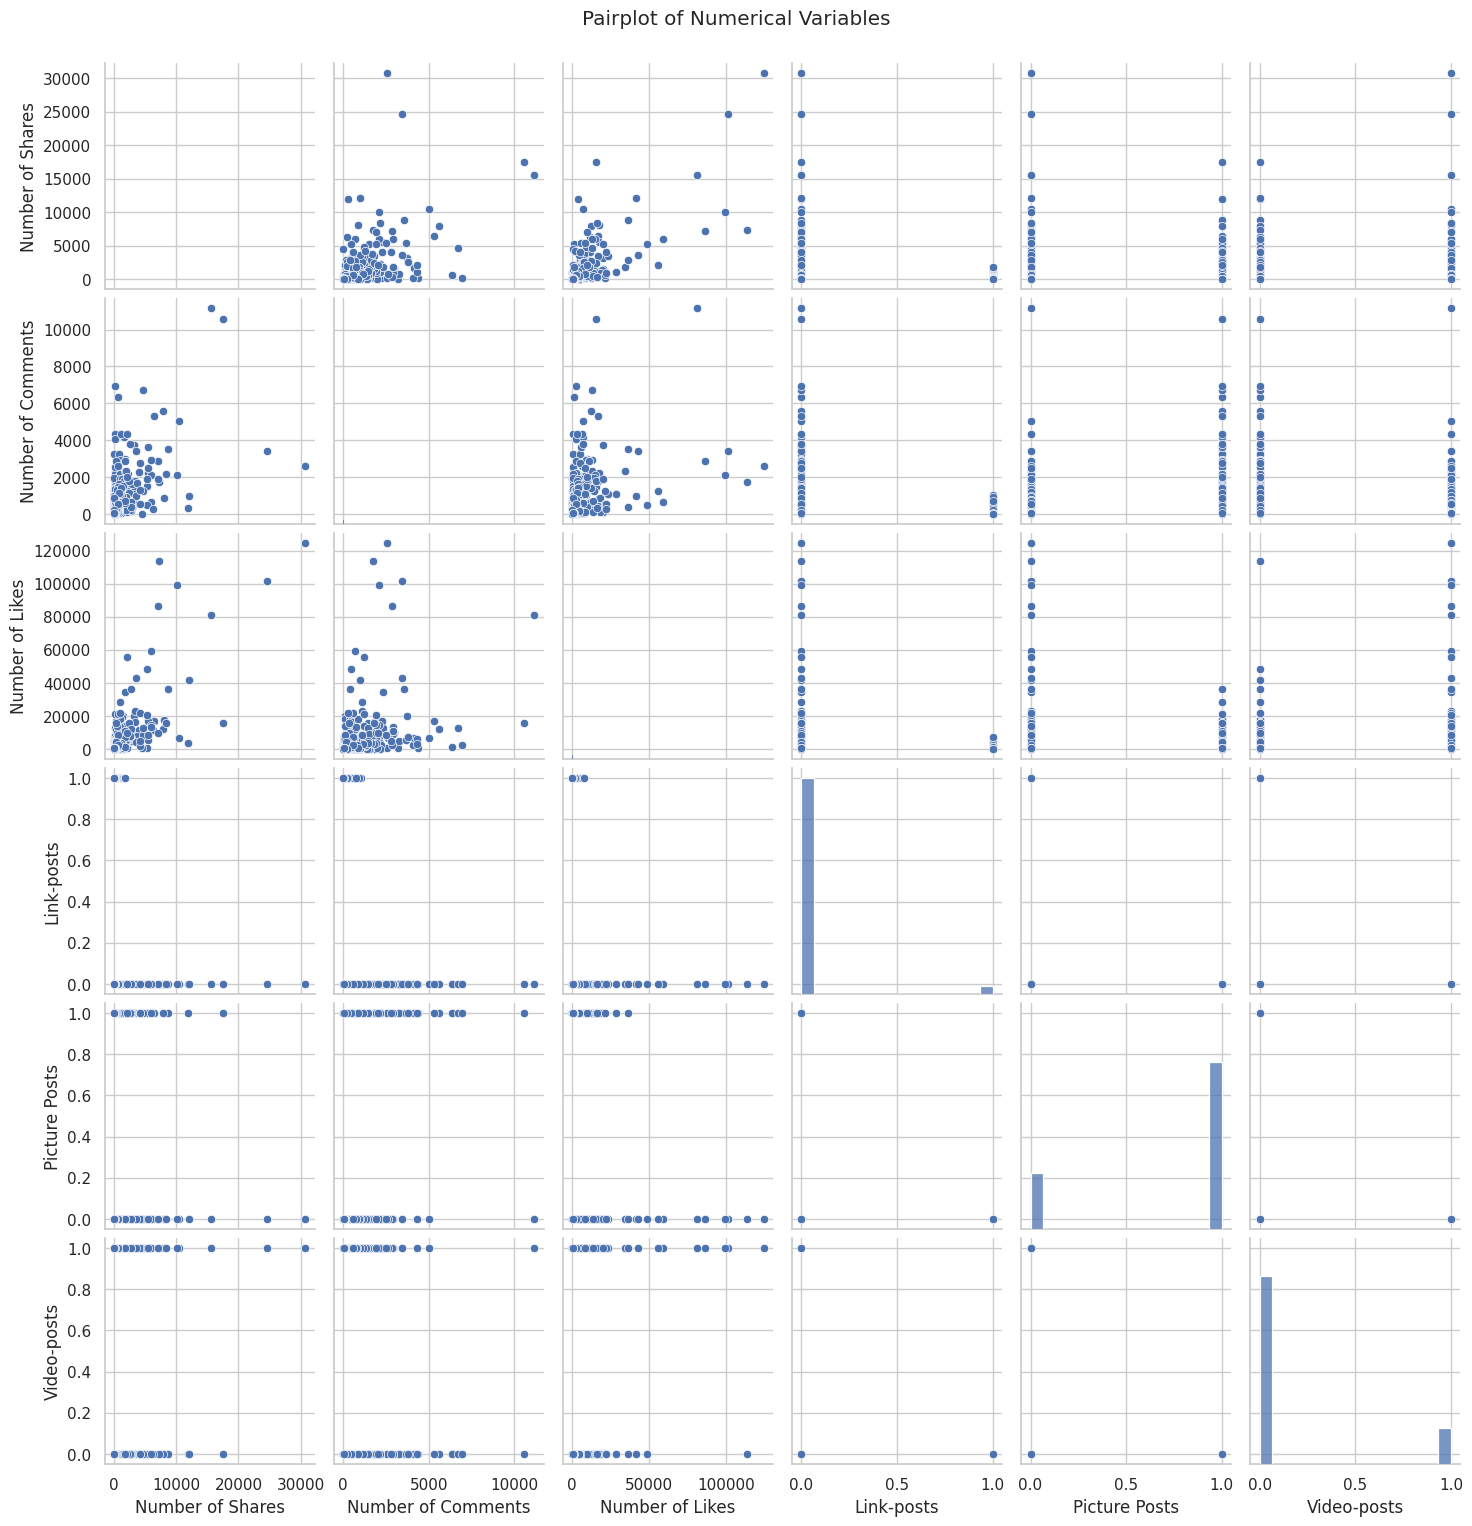

In [55]:
# Select only numerical columns
numerical_columns = merged_themepark.select_dtypes(include=['float64', 'int64'])

# Pairplot for scatter plots
sns.pairplot(numerical_columns)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

**General Observations**
The grid of scatter plots for different variable pairings in a dataset, along with histograms or density plots along the diagonal for each individual variable.

Starting from the top left, we have the following:

- **Histograms for the Number of Shares, Number of Comments, and Number of Likes**: These show the distribution of each variable. All three histograms indicate right-skewed distributions, meaning most of the data points are clustered towards the lower end of the scale with a few outliers extending towards the higher values.

- **Scatter Plots for Shares, Comments, and Likes**: The scatter plots show potential relationships between these numerical variables. There's a concentration of points near the origin (bottom left) of each plot, which suggests that posts with low engagement (few shares, comments, or likes) are common. There are fewer posts with high engagement. The plots for shares vs. likes and comments vs. likes seem to show some degree of positive correlation, meaning that as one increases, the other tends to increase as well.

- **Scatter Plots Involving Link-posts, Picture Posts, and Video-posts**: These binary variables are plotted against the numerical variables. The plots are very sparse because the binary nature of these variables means they only take on two values, 0 or 1. For these plots, we can't discern any clear patterns or correlations from the scatter plots directly.

- **Histograms for Link-posts, Picture Posts, and Video-posts**: These are not histograms in the traditional sense because they are binary variables. They appear as two vertical lines, one for each possible value (0 or 1). We see a high bar at 0 for Link-posts and Video-posts, indicating that most posts do not contain links or videos. For Picture Posts, the high bar is at 1, indicating most posts do contain pictures.

From this visualization, we can confirm some of the correlations observed in the heatmap. Namely, there is a positive relationship between the number of shares, comments, and likes. However, no clear pattern emerges between these numerical variables and the binary post type variables (links, pictures, videos), which is consistent with the weak correlations observed in the heatmap.

**Outliers**
The pair plot provided does offer some information on outliers for the numerical variables of shares, comments, and likes.

Outliers in a dataset are data points that differ significantly from other observations. They can be spotted in scatter plots as points that are located far away from the cluster of other points.

- **Number of Shares**: There are some posts that have an exceptionally high number of shares compared to most of the data, which is clustered near the bottom of the y-axis. These outliers are evident in the plots where the number of shares is on the y-axis.

- **Number of Comments**: A similar pattern is seen with the number of comments, where there are a few posts with a very high number of comments, standing out from the rest.

- **Number of Likes**: The number of likes also has outliers, indicated by points far above the dense cluster at the lower end of the range.

The binary variables (Link-posts, Picture Posts, and Video-posts) do not provide information about outliers in the traditional sense, since they are categorical with only two values, 0 or 1. However, in their histograms (diagonal plots), you can see the distribution of posts with or without these features.

In each non-binary scatter plot, most of the data points are clustered near the origin, which indicates lower values for each of the variables. However, there are data points that stand out significantly from this cluster—these are far from the dense area and are isolated from other points. These points are the outliers and they indicate posts that have a much higher number of shares, comments, or likes compared to the rest.

Outliers do not necessarily need to be removed, especially if they represent valid data. In the context of measuring social media performance, outliers could be very informative as they may represent posts that have gone viral or elicited unusually high engagement for some reason. These posts could be particularly valuable to study since they might provide insights into what drives higher engagement on social media. When analyzing user engagement and trying to understand the interconnection between different types of posts and the reactions they generate (like shares, comments, and likes), it is crucial to consider all data, including outliers.

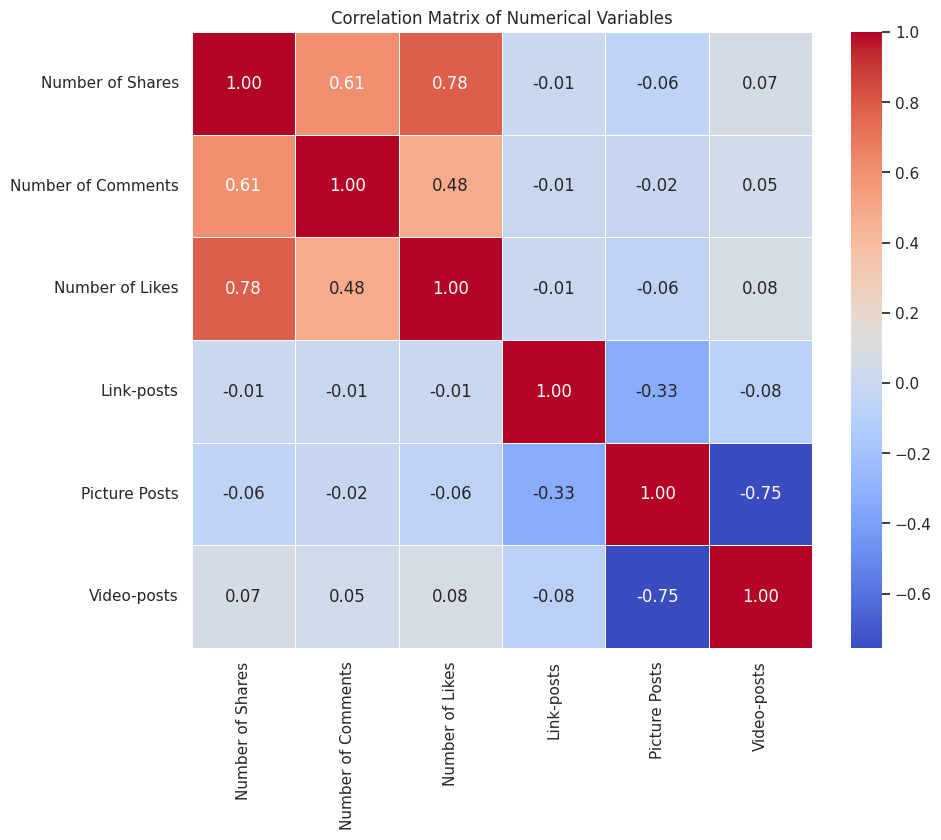

In [56]:
# Select only numerical columns
numerical_columns = merged_themepark.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

The image is a heatmap representing a correlation matrix of numerical variables which appear to be associated with social media posts. The matrix shows the correlation coefficients between pairs of variables, which range from -1 to 1. A correlation coefficient close to 1 indicates a strong positive relationship, close to -1 indicates a strong negative relationship, and around 0 indicates no relationship. Let's interpret the correlations:

- **Number of Shares, Comments, and Likes**: These variables are positively correlated with each other. The number of shares has a strong positive correlation with the number of likes (0.78) and a moderate positive correlation with the number of comments (0.61). Similarly, the number of comments and likes are moderately correlated (0.48). This suggests that posts which receive a lot of likes also tend to get shared and commented on more frequently.

- **Link-posts, Picture Posts, and Video-posts**: These represent binary variables, likely indicating the presence (1) or absence (0) of a link, picture, or video in the posts.
  - Link-posts do not show any significant correlation with shares, comments, or likes (all coefficients are around -0.01 to 0.01), suggesting that the presence of a link does not strongly affect the number of shares, comments, or likes a post gets.
  - Picture Posts show a moderate negative correlation with Link-posts (-0.33) and a strong negative correlation with Video-posts (-0.75), indicating that posts with pictures are less likely to have links or videos.
  - Video-posts have a small positive correlation with the number of shares (0.07) and likes (0.08), and an even smaller one with the number of comments (0.05), which may suggest that video posts are slightly more likely to be shared or liked, but this correlation is very weak.

The strong negative correlation between Picture Posts and Video-posts (-0.75) is the most significant amongst the post types, which indicates that it's quite rare for posts to contain both a picture and a video.

The heatmap is a visual tool that helps quickly identify which variables are related and the strength of their relationship. It’s important to remember that correlation does not imply causation; these correlations do not confirm that one variable causes changes in another, only that they are associated.

In [57]:
# Print the first rows
merged_themepark.head()

,Date,Profile,Message,Number of Shares,Number of Comments,Number of Likes,Link-posts,Picture Posts,Video-posts
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,2.0,2.0,13.0,0.0,1.0,0.0
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,2.0,1.0,33.0,0.0,0.0,0.0
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,3.0,2.0,21.0,0.0,0.0,1.0
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,12.0,56.0,478.0,0.0,1.0,0.0
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,0.0,2.0,16.0,0.0,0.0,1.0


**Conclusion**

- `Manual Input of Level 2 Control Variable Information` As part of the feature engineering process (2.0 Feature Engineering), Level 2 control variable information will be manually inputted into the dataset. This information specifically pertains to the number of followers, which will be obtained from the Facebook pages of the respective theme parks. This step aims to enrich the dataset with valuable control variables, providing additional insights into the audience reach and engagement levels of each theme park.
- `Geographical Location` During the feature engineering process, Manual Input of Level 2 Control Variable Information (2.0 Feature Engineering), the geographical locations of the US and non-U.S. theme parks will be confirmed manually, which will be obtained from the Facebook pages of the respective theme parks. This action aims to focus the analysis on U.S.-based theme parks specifically.
- `Date` consists of data and time in one feature, it needs a split into two separate columns, which will be preformed in 2.0 Feature Engineering. Further, calendar date (e.g. DD/MM/YY) will be converted into the days of the week (e.g. Monday, Tuesday, ..., Sunday). This action aims to provide an understanding of which day of the week is the best for posting and obtainining certain user engagement metrics, namely likes, comments, shares.
- `Time` consists of time in the format of (hour:minute), we will categorise is into morning, afternoon, and evening. This action aims to provide an understanding of which time of the day is the best for posting and obtainining certain user engagement metrics, namely likes, comments, shares.
- `Message: Length` varies in length, characters, use of symbols and emoticons, which will be categorised into categorical (low, medium, high), based on amount of characters. Which will be preformed in 2.0 Feature Engineering.
- `Message: Lingustic style` also varies in linguistic style, which will be categorised into formal or informal type of messages, based on the type of languagues, emojis, and punctuation marks.
- `Number of Shares`, `Number of Comments`, `Number of Likes`, `Link-posts`, `Picture Posts`, and `Video-posts` columns won't be envolved in the feature engineering process (2.0 Feature Engineering), as they are ready for 3.0 Analysis


# 2.0 Feature Engineering

#### **Level two variable: Number of followers + Geographical Location check** - Mike

In [58]:
# Let's check whether there are some errors in the Profile column
# Check for name errors in the Profile column
name_errors = merged_themepark['Profile'].value_counts()

# Display theme parks with less than 5 occurrences (assuming potential errors may be infrequent)
potential_errors = name_errors[name_errors < 5]

# Display potential errors
print(potential_errors)

Series([], Name: Profile, dtype: int64)


It appears that there are no potential errors or inconsistencies in the "Profile" column based on the current threshold (less than 5 occurrences). This is indicated by an empty Series, meaning all unique theme park names occur with a frequency of 5 or more times in the dataset.

However, we need to see whether the names of the theme parks in the "Profile" column are consistent

In [59]:
# Get unique theme parks and count the number of unique parks
unique_theme_parks = merged_themepark['Profile'].unique()
sorted_unique_theme_parks = sorted(unique_theme_parks)

# Count the number of unique theme parks after sorting
num_unique_theme_parks_sorted = len(sorted_unique_theme_parks)

# Print the number of unique theme parks and the updated list of unique theme park names
print("Number of unique theme parks:", num_unique_theme_parks_sorted)
print(sorted_unique_theme_parks)

Number of unique theme parks: 59
["ACN - America's Coaster Network", 'Adventure City', 'Belmont Park', "Big Kahuna's NJ", 'Busch Gardens Tampa Bay', 'Busch Gardens Williamsburg', 'Calaway Park', "California's Great America", "Canada's Wonderland", 'Castles & Coasters', 'Castles N Coasters', 'Cedar Point', 'Centreville Amusement Park', 'Disneyland', 'Disneyland Paris', 'Elitch Gardens', 'Enchanted Island Amusement Park', 'Fun Spot America', 'Funland Rehoboth Beach', 'Gilroy Gardens', 'Glenwood Caverns Adventure Park', 'Happy Hollow Park & Zoo', 'Hersheypark', 'Hurricane Harbor Oklahoma City', 'Kings Island', "Knott's Berry Farm", 'LEGOLAND California', 'Lake Compounce', 'Lake Winnie', 'MarineLand', 'Pacific Park', 'Playland', 'Playland Park', 'Quassy Amusement & Waterpark', 'Santa Cruz Beach Boardwalk', "Santa's Workshop North Pole, Colorado", 'Sea Life Park', 'SeaWorld', 'SeaWorld Orlando', 'SeaWorld San Diego', 'Sesame Place San Diego', 'Silverwood Theme Park', 'Six Flags', 'Six Flags

It appears that there are some theme parks that have potential duplicates (e.g. 'Castles & Coasters', 'Castles N Coasters'), which needs examination, besides, let's normalise the data into small letters to avoid potential inconsistency

In [60]:
# Convert all theme park names to lowercase
merged_themepark['Profile'] = merged_themepark['Profile'].str.lower()

# Get unique theme parks and count the number of unique parks
unique_theme_parks = merged_themepark['Profile'].unique()
sorted_unique_theme_parks = sorted(unique_theme_parks)

# Count the number of unique theme parks after sorting
num_unique_theme_parks_sorted = len(sorted_unique_theme_parks)

# Print the number of unique theme parks and the updated list of unique theme park names
print("Number of unique theme parks:", num_unique_theme_parks_sorted)
print(sorted_unique_theme_parks)

Number of unique theme parks: 59
["acn - america's coaster network", 'adventure city', 'belmont park', "big kahuna's nj", 'busch gardens tampa bay', 'busch gardens williamsburg', 'calaway park', "california's great america", "canada's wonderland", 'castles & coasters', 'castles n coasters', 'cedar point', 'centreville amusement park', 'disneyland', 'disneyland paris', 'elitch gardens', 'enchanted island amusement park', 'fun spot america', 'funland rehoboth beach', 'gilroy gardens', 'glenwood caverns adventure park', 'happy hollow park & zoo', 'hersheypark', 'hurricane harbor oklahoma city', 'kings island', "knott's berry farm", 'lake compounce', 'lake winnie', 'legoland california', 'marineland', 'pacific park', 'playland', 'playland park', 'quassy amusement & waterpark', 'santa cruz beach boardwalk', "santa's workshop north pole, colorado", 'sea life park', 'seaworld', 'seaworld orlando', 'seaworld san diego', 'sesame place san diego', 'silverwood theme park', 'six flags', 'six flags

There are 59 unique theme parks in the dataset.
After double checking these theme parks on Facebook, it became apparent that:
- 'disneyland paris' and "canada's wonderland" are not located in the U.S., therefore will be dropped from the dataset, since we are solely focusing on the U.S. theme parks.
- 'castles & coasters' is a wedding organization company, that has nothing to do with theme parks, therefore will be dropped from the dataset. Whereas 'castles n coasters' is a theme park.
- 'walt disney studios (us)' is a main page of Walt Disney Studios (US) studio, and not a theme park, therefore will be dropped from the dataset.

In [61]:
# Names to be dropped
names_to_drop = ["canada's wonderland", 'castles & coasters', 'disneyland paris', 'walt disney studios (us)']

# Dropping rows containing specified names
merged_themepark = merged_themepark[~merged_themepark['Profile'].isin(names_to_drop)]

In [62]:
# Get unique theme parks and count the number of unique parks
unique_theme_parks = merged_themepark['Profile'].unique()
sorted_unique_theme_parks = sorted(unique_theme_parks)

# Count the number of unique theme parks after sorting
num_unique_theme_parks_sorted = len(sorted_unique_theme_parks)

# Print the number of unique theme parks and the updated list of unique theme park names
print("Number of unique theme parks:", num_unique_theme_parks_sorted)
print(sorted_unique_theme_parks)

Number of unique theme parks: 55
["acn - america's coaster network", 'adventure city', 'belmont park', "big kahuna's nj", 'busch gardens tampa bay', 'busch gardens williamsburg', 'calaway park', "california's great america", 'castles n coasters', 'cedar point', 'centreville amusement park', 'disneyland', 'elitch gardens', 'enchanted island amusement park', 'fun spot america', 'funland rehoboth beach', 'gilroy gardens', 'glenwood caverns adventure park', 'happy hollow park & zoo', 'hersheypark', 'hurricane harbor oklahoma city', 'kings island', "knott's berry farm", 'lake compounce', 'lake winnie', 'legoland california', 'marineland', 'pacific park', 'playland', 'playland park', 'quassy amusement & waterpark', 'santa cruz beach boardwalk', "santa's workshop north pole, colorado", 'sea life park', 'seaworld', 'seaworld orlando', 'seaworld san diego', 'sesame place san diego', 'silverwood theme park', 'six flags', 'six flags darien lake', 'six flags discovery kingdom', 'six flags great ad

There are 55 theme parks in the U.S., now we create a column Number of followers (Level 2 control variable), which we will manually inpute below.

In [63]:
# Manually record the number of followers for each theme park
followers_data ={
    "acn - america's coaster network": 4000,
    'adventure city': 35000,
    'belmont park': 51000,
    "big kahuna's nj": 181000,
    'busch gardens tampa bay': 692000,
    'busch gardens williamsburg': 690000,
    'calaway park': 46000,
    "california's great america": 262000,
    'castles n coasters': 2300,
    'cedar point': 1500000,
    'centreville amusement park': 17000,
    'disneyland': 16000000,
    'elitch gardens': 145000,
    'enchanted island amusement park': 15000,
    'fun spot america': 22000,
    'funland rehoboth beach': 29000,
    'glenwood caverns adventure park': 93000,
    'gilroy gardens': 83000,
    'happy hollow park & zoo': 39000,
    'hersheypark': 854000,
    'hurricane harbor oklahoma city': 43000,
    "knott's berry farm": 637000,
    'kings island': 692000,
    'lake compounce': 166000,
    'lake winnie': 123000,
    'legoland california': 650000,
    'marineland': 87000,
    'pacific park': 55000,
    'playland': 47000,
    'playland park': 48000,
    'quassy amusement & waterpark': 39000,
    'santa cruz beach boardwalk': 400000,
    "santa's workshop north pole, colorado": 46000,
    'sea life park': 26000,
    'seaworld': 1700000,
    'seaworld orlando': 267000,
    'seaworld san diego': 127000,
    'sesame place san diego': 29000,
    "skypark at santa's village": 57000,
    'silverwood theme park': 381000,
    'six flags': 4400000,
    'six flags darien lake': 226000,
    'six flags discovery kingdom': 275000,
    'six flags great adventure': 1100000,
    'six flags great america/hurricane harbor': 733000,
    'six flags great escape and hurricane harbor': 84000,
    'six flags magic mountain': 660000,
    'six flags over georgia & hurricane harbor': 479000,
    'universal orlando resort (us)': 246000,
    'universal studios hollywood': 2700000,
    'walt disney animation studios': 12000000,
    'walt disney world': 16000000,
    'waterville usa': 58000,
    'west edmonton mall': 189000,
    'wild adventures theme park': 66
}


# Create a new column in the dataset with the number of followers
merged_themepark['Number of Followers'] = merged_themepark['Profile'].map(followers_data)

# Display the dataset with the new column
print(merged_themepark)


                   Date                                    Profile  \
0      12/31/23 9:40 PM                 wild adventures theme park   
1      12/31/23 8:01 PM                           fun spot america   
2      12/31/23 7:30 PM                           fun spot america   
4      12/31/23 7:00 PM                      silverwood theme park   
5      12/31/23 6:55 PM                               belmont park   
...                 ...                                        ...   
15437  01/01/2023 03:53                    happy hollow park & zoo   
15438  01/01/2023 02:00                 wild adventures theme park   
15439  01/01/2023 01:20                                   playland   
15441  01/01/2023 00:00  six flags over georgia & hurricane harbor   
15442  01/01/2023 00:00                         knott's berry farm   

                                                 Message  Number of Shares  \
0      🎟️🚨 Today's the FINAL day to use your 2023 Sea...               2.0   
1  

<ipython-input-63-e38ad9c9b4ef>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_themepark['Number of Followers'] = merged_themepark['Profile'].map(followers_data)


In [64]:
merged_themepark.head()

,Date,Profile,Message,Number of Shares,Number of Comments,Number of Likes,Link-posts,Picture Posts,Video-posts,Number of Followers
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,2.0,2.0,13.0,0.0,1.0,0.0,66
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,2.0,1.0,33.0,0.0,0.0,0.0,22000
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,3.0,2.0,21.0,0.0,0.0,1.0,22000
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,0.0,2.0,16.0,0.0,0.0,1.0,381000
5,12/31/23 6:55 PM,belmont park,The sun sets over 2023…🌅\n\nWishing everyone a...,11.0,1.0,40.0,0.0,1.0,0.0,51000


In [65]:
# Let's check whether the manual computation worked well
# Check statistical summary of the 'Number of Followers' column
print(merged_themepark['Number of Followers'].describe())

# Check if there are any 0.0 or NaN values in the 'Number of Followers' column
zero_values = merged_themepark[merged_themepark['Number of Followers'] == 0.0]
nan_values = merged_themepark[merged_themepark['Number of Followers'].isnull()]

print("Number of 0.0 values in 'Number of Followers' column:", len(zero_values))
print("Number of NaN values in 'Number of Followers' column:", len(nan_values))

count    1.428900e+04
mean     1.059568e+06
std      2.951407e+06
min      6.600000e+01
25%      4.700000e+04
50%      1.890000e+05
75%      6.900000e+05
max      1.600000e+07
Name: Number of Followers, dtype: float64
Number of 0.0 values in 'Number of Followers' column: 0
Number of NaN values in 'Number of Followers' column: 0


In [66]:
# Let's check which parks have the most/least number of followers
# Remove duplicate entries for the same park
unique_parks_df = merged_themepark.drop_duplicates(subset=['Profile'])

# Sort the DataFrame based on 'Number of Followers' column in descending order
sorted_df = unique_parks_df.sort_values(by='Number of Followers', ascending=False)

# Print the park with the most followers
print("Park with the most followers:")
print(sorted_df[['Profile', 'Number of Followers']].head(1))

# Print the distribution of followers within the 'Number of Followers' column
print("Distribution of followers within the 'Number of Followers' column:")
print(sorted_df[['Profile', 'Number of Followers']])

Park with the most followers:
               Profile  Number of Followers
198  walt disney world             16000000
Distribution of followers within the 'Number of Followers' column:
                                          Profile  Number of Followers
198                             walt disney world             16000000
117                                    disneyland             16000000
33                  walt disney animation studios             12000000
72                                      six flags              4400000
651                   universal studios hollywood              2700000
26                                       seaworld              1700000
40                                    cedar point              1500000
20                      six flags great adventure              1100000
14                                    hersheypark               854000
218      six flags great america/hurricane harbor               733000
25                                

From the last two codes, we get an idea of the number of followers per page. Nothing surprising, biggest, well-known names have the most followers.
Below we will categorise these parks into low, medium, and high number of followers, based on the percentiles shown above:
- 25%      4.700000e+04
- 50%      1.890000e+05
- 75%      6.900000e+05

In [67]:
# Define the quartiles
first_quartile = 47000
third_quartile = 690000

# Define the bin edges
bin_edges = [0, first_quartile, third_quartile, float('inf')]

# Define the bin labels
bin_labels = ['Low', 'Medium', 'High']

# Create a new column 'Follower Category' based on the 'Number of Followers' column
merged_themepark['Follower Category'] = pd.cut(merged_themepark['Number of Followers'], bins=bin_edges, labels=bin_labels, right=False)

# Display the DataFrame with the new column
print(merged_themepark)

                   Date                                    Profile  \
0      12/31/23 9:40 PM                 wild adventures theme park   
1      12/31/23 8:01 PM                           fun spot america   
2      12/31/23 7:30 PM                           fun spot america   
4      12/31/23 7:00 PM                      silverwood theme park   
5      12/31/23 6:55 PM                               belmont park   
...                 ...                                        ...   
15437  01/01/2023 03:53                    happy hollow park & zoo   
15438  01/01/2023 02:00                 wild adventures theme park   
15439  01/01/2023 01:20                                   playland   
15441  01/01/2023 00:00  six flags over georgia & hurricane harbor   
15442  01/01/2023 00:00                         knott's berry farm   

                                                 Message  Number of Shares  \
0      🎟️🚨 Today's the FINAL day to use your 2023 Sea...               2.0   
1  

In [68]:
merged_themepark.head()

,Date,Profile,Message,Number of Shares,Number of Comments,Number of Likes,Link-posts,Picture Posts,Video-posts,Number of Followers,Follower Category
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,2.0,2.0,13.0,0.0,1.0,0.0,66,Low
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,2.0,1.0,33.0,0.0,0.0,0.0,22000,Low
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,3.0,2.0,21.0,0.0,0.0,1.0,22000,Low
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,0.0,2.0,16.0,0.0,0.0,1.0,381000,Medium
5,12/31/23 6:55 PM,belmont park,The sun sets over 2023…🌅\n\nWishing everyone a...,11.0,1.0,40.0,0.0,1.0,0.0,51000,Medium


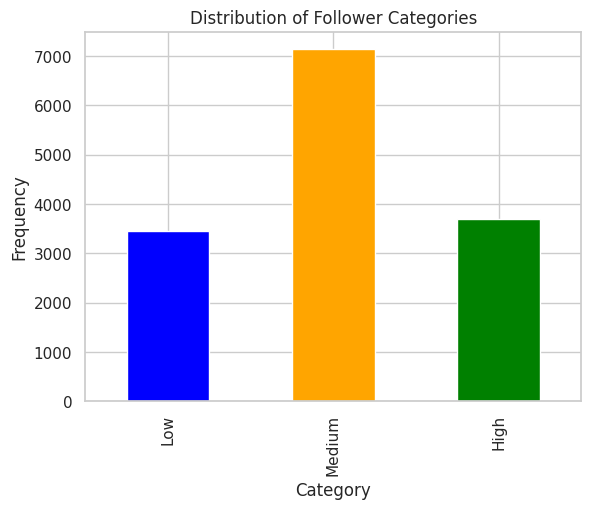

In [69]:
# Let's see how many parks fall into each category
# Count the frequency of each category
category_counts = merged_themepark['Follower Category'].value_counts()

# Sort the categories based on their index order
category_counts = category_counts.reindex(['Low', 'Medium', 'High'])

# Plot the distribution
category_counts.plot(kind='bar', color=['blue', 'orange', 'green'])

# Add labels and title
plt.title('Distribution of Follower Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Show the plot
plt.show()


The bar graph represents the distribution of follower categories based on percentiles. The "Low" category includes accounts below the 25th percentile, the "Medium" category encompasses those between the 25th and 75th percentiles, and the "High" category includes accounts above the 75th percentile.

The "Low" category is indicated by a blue bar, showing a frequency that suggests fewer accounts fall below the 25th percentile compared to the other categories.
The "Medium" category, represented by an orange bar, has the highest frequency, with a count over 6000. This is consistent with the definition of percentiles, as it represents the broad middle 50% of the data.
The "High" category is shown with a green bar, which has a frequency higher than the "Low" category but less than the "Medium" category, indicating that fewer accounts have a follower count above the 75th percentile.

#### **Day/Date** - Saharla

First we going to seperate the time and day

In [70]:
# Exact date format to parse it more efficiently by inferring datetime format
merged_themepark['Date'] = pd.to_datetime(merged_themepark['Date'], infer_datetime_format=True)

In [71]:
# Create a Time feature
merged_themepark['New_Date'] = merged_themepark['Date'].dt.date
merged_themepark['Time'] = merged_themepark['Date'].dt.time

# Now drop the original 'Date' column since it has been split
merged_themepark = merged_themepark.drop('Date', axis=1)

Checking if the day and time are in 2 seperate columns

In [72]:
merged_themepark.head()

,Profile,Message,Number of Shares,Number of Comments,Number of Likes,Link-posts,Picture Posts,Video-posts,Number of Followers,Follower Category,New_Date,Time
0,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,2.0,2.0,13.0,0.0,1.0,0.0,66,Low,2023-12-31,21:40:00
1,fun spot america,See you next year! 😉 Don’t miss...,2.0,1.0,33.0,0.0,0.0,0.0,22000,Low,2023-12-31,20:01:00
2,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,3.0,2.0,21.0,0.0,0.0,1.0,22000,Low,2023-12-31,19:30:00
4,silverwood theme park,It's the last day of our New Year's Sale! Save...,0.0,2.0,16.0,0.0,0.0,1.0,381000,Medium,2023-12-31,19:00:00
5,belmont park,The sun sets over 2023…🌅\n\nWishing everyone a...,11.0,1.0,40.0,0.0,1.0,0.0,51000,Medium,2023-12-31,18:55:00


#### **Day** - Saharla

To analyze the impact of the day of posting on engagement, feature engineering will be performed on the date data. The date of posting will be transformed into seven different binary features, each representing a day of the week (Monday through Sunday). This transformation will enable a more detailed analysis of how each specific day contributes to engagement metrics such as likes, shares, and comments. Converting the date into binary features for each day of the week makes it easier to determine the optimal days for posting content on Facebook to maximize engagement.

In [73]:

# Ensure 'New_Date' is a pandas datetime series
merged_themepark['New_Date'] = pd.to_datetime(merged_themepark['New_Date'])

# Add a new 'weekday' column based on 'New_Date'
merged_themepark['weekday'] = merged_themepark['New_Date'].dt.day_name()

# Convert 'New_Date' back to date object
merged_themepark['New_Date'] = merged_themepark['New_Date'].dt.date

# Create separate columns for each day of the week, the result will be in 0s and 1s
weekdays_dummies = pd.get_dummies(merged_themepark['weekday'])
merged_themepark = pd.concat([merged_themepark, weekdays_dummies], axis=1)

In [74]:
weekday_columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert each weekday column from True/False to 0/1
for day in weekday_columns:
    merged_themepark[day] = merged_themepark[day].astype(int)

In [75]:
#check if the new columns are added
merged_themepark.head()

,Profile,Message,Number of Shares,Number of Comments,Number of Likes,Link-posts,Picture Posts,Video-posts,Number of Followers,Follower Category,New_Date,Time,weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,2.0,2.0,13.0,0.0,1.0,0.0,66,Low,2023-12-31,21:40:00,Sunday,0,0,0,1,0,0,0
1,fun spot america,See you next year! 😉 Don’t miss...,2.0,1.0,33.0,0.0,0.0,0.0,22000,Low,2023-12-31,20:01:00,Sunday,0,0,0,1,0,0,0
2,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,3.0,2.0,21.0,0.0,0.0,1.0,22000,Low,2023-12-31,19:30:00,Sunday,0,0,0,1,0,0,0
4,silverwood theme park,It's the last day of our New Year's Sale! Save...,0.0,2.0,16.0,0.0,0.0,1.0,381000,Medium,2023-12-31,19:00:00,Sunday,0,0,0,1,0,0,0
5,belmont park,The sun sets over 2023…🌅\n\nWishing everyone a...,11.0,1.0,40.0,0.0,1.0,0.0,51000,Medium,2023-12-31,18:55:00,Sunday,0,0,0,1,0,0,0


#### **Time** - Saharla

To analyze the impact of the time of posting on engagement, feature engineering will be performed on the time data. The time of posting will be transformed into three different features, each representing a time of the day (Morning, aftternoon and evening). This transformation will enable a more detailed analysis of how each specific time contributes to engagement metrics such as likes, shares, and comments.

In [76]:
# Function to categorize time of day
def categorize_time_of_day(time_obj):
    if time_obj.hour < 12:
        return 'Morning'
    elif 12 <= time_obj.hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the function to the 'Time' column to create a new 'time_of_day' column
merged_themepark['time_of_day'] = merged_themepark['Time'].apply(categorize_time_of_day)

In [77]:
#checking if the new columns are added
merged_themepark.head()

,Profile,Message,Number of Shares,Number of Comments,Number of Likes,Link-posts,Picture Posts,Video-posts,Number of Followers,Follower Category,...,Time,weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,time_of_day
0,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,2.0,2.0,13.0,0.0,1.0,0.0,66,Low,...,21:40:00,Sunday,0,0,0,1,0,0,0,Evening
1,fun spot america,See you next year! 😉 Don’t miss...,2.0,1.0,33.0,0.0,0.0,0.0,22000,Low,...,20:01:00,Sunday,0,0,0,1,0,0,0,Evening
2,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,3.0,2.0,21.0,0.0,0.0,1.0,22000,Low,...,19:30:00,Sunday,0,0,0,1,0,0,0,Evening
4,silverwood theme park,It's the last day of our New Year's Sale! Save...,0.0,2.0,16.0,0.0,0.0,1.0,381000,Medium,...,19:00:00,Sunday,0,0,0,1,0,0,0,Evening
5,belmont park,The sun sets over 2023…🌅\n\nWishing everyone a...,11.0,1.0,40.0,0.0,1.0,0.0,51000,Medium,...,18:55:00,Sunday,0,0,0,1,0,0,0,Evening


#### **Message** - Saharla & Kelvin

#### **Message: Length** - Saharla

We want to add 3 new columns to analyze the length of the text. The new columns are going to be low, medium and high. In the literature research we found out that characters that are longer than 80 characters were more likely to have a higher level of user engagement (Gkikas et al., 2022). Therefore, Gkikas et al. (2022) adopted an 80-character threshold as a key indicator of user engagement and organized the texts into 80-character intervals: 0-80, 81-160, 161-240, 241-320, 321-400, 401-480, and 481-500. So anything less than 160 will be low. Anything between 160 and 320 will be medium and above 320 will be high.

In [78]:
# Define a function to categorize posts based on length
def categorize_length(length):
    if length <= 160:
        return 'Postlength Low'
    elif length <= 320:
        return 'Postlength Medium'
    else:
        return 'Postlength High'

# Calculate character length of each post
merged_themepark['char_length'] = merged_themepark['Message'].apply(len)

# Categorize posts based on character length
merged_themepark['post_length_category'] = merged_themepark['char_length'].apply(categorize_length)

# Check the distribution of categories
print(merged_themepark['post_length_category'].value_counts())

# One-hot encode the 'post_length_category' into separate columns
merged_themepark['Postlength Low'] = (merged_themepark['post_length_category'] == 'Postlength Low').astype(int)
merged_themepark['Postlength Medium'] = (merged_themepark['post_length_category'] == 'Postlength Medium').astype(int)
merged_themepark['Postlength High'] = (merged_themepark['post_length_category'] == 'Postlength High').astype(int)

Postlength Medium    5532
Postlength Low       5419
Postlength High      3338
Name: post_length_category, dtype: int64


In [79]:
# Checking the first few rows to confirm the new columns are added correctly
merged_themepark.head()

,Profile,Message,Number of Shares,Number of Comments,Number of Likes,Link-posts,Picture Posts,Video-posts,Number of Followers,Follower Category,...,Sunday,Thursday,Tuesday,Wednesday,time_of_day,char_length,post_length_category,Postlength Low,Postlength Medium,Postlength High
0,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,2.0,2.0,13.0,0.0,1.0,0.0,66,Low,...,1,0,0,0,Evening,337,Postlength High,0,0,1
1,fun spot america,See you next year! 😉 Don’t miss...,2.0,1.0,33.0,0.0,0.0,0.0,22000,Low,...,1,0,0,0,Evening,141,Postlength Low,1,0,0
2,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,3.0,2.0,21.0,0.0,0.0,1.0,22000,Low,...,1,0,0,0,Evening,128,Postlength Low,1,0,0
4,silverwood theme park,It's the last day of our New Year's Sale! Save...,0.0,2.0,16.0,0.0,0.0,1.0,381000,Medium,...,1,0,0,0,Evening,227,Postlength Medium,0,1,0
5,belmont park,The sun sets over 2023…🌅\n\nWishing everyone a...,11.0,1.0,40.0,0.0,1.0,0.0,51000,Medium,...,1,0,0,0,Evening,342,Postlength High,0,0,1


#### **Message: Linguistics Style** - Kelvin

In [80]:
# Final version of the dataframe after 2.0 Feature Engineering process
merged_themepark.head()

,Profile,Message,Number of Shares,Number of Comments,Number of Likes,Link-posts,Picture Posts,Video-posts,Number of Followers,Follower Category,...,Sunday,Thursday,Tuesday,Wednesday,time_of_day,char_length,post_length_category,Postlength Low,Postlength Medium,Postlength High
0,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,2.0,2.0,13.0,0.0,1.0,0.0,66,Low,...,1,0,0,0,Evening,337,Postlength High,0,0,1
1,fun spot america,See you next year! 😉 Don’t miss...,2.0,1.0,33.0,0.0,0.0,0.0,22000,Low,...,1,0,0,0,Evening,141,Postlength Low,1,0,0
2,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,3.0,2.0,21.0,0.0,0.0,1.0,22000,Low,...,1,0,0,0,Evening,128,Postlength Low,1,0,0
4,silverwood theme park,It's the last day of our New Year's Sale! Save...,0.0,2.0,16.0,0.0,0.0,1.0,381000,Medium,...,1,0,0,0,Evening,227,Postlength Medium,0,1,0
5,belmont park,The sun sets over 2023…🌅\n\nWishing everyone a...,11.0,1.0,40.0,0.0,1.0,0.0,51000,Medium,...,1,0,0,0,Evening,342,Postlength High,0,0,1


# 3.0 Analysis

#### **Posting time and Day** - Saharla

H1: There is a statistically significant effect of posting time on likes, shares, and comments.

H2: There is a statistically significant effect of posting day on likes, shares, and comments.

**Time**

**Day**

#### **Content Format** - Mike

H3: There is a statistically significant effect of posts containing photo on likes, comments, and shares.

H4: There is a statistically significant effect of posts containing video on likes, comments, and shares.

H5: There is a statistically significant effect of posts containing link on likes, comments, and shares.

In [82]:
# Calculate mean values of likes, comments, and shares for each post type
mean_likes = merged_themepark.groupby(['Picture Posts', 'Link-posts', 'Video-posts'])['Number of Likes'].mean()
mean_comments = merged_themepark.groupby(['Picture Posts', 'Link-posts', 'Video-posts'])['Number of Comments'].mean()
mean_shares = merged_themepark.groupby(['Picture Posts', 'Link-posts', 'Video-posts'])['Number of Shares'].mean()

print("Mean Likes:")
print(mean_likes)
print("\nMean Comments:")
print(mean_comments)
print("\nMean Shares:")
print(mean_shares)

# Assumptions Check
# Normality of residuals
likes_normality = shapiro(merged_themepark['Number of Likes'])
comments_normality = shapiro(merged_themepark['Number of Comments'])
shares_normality = shapiro(merged_themepark['Number of Shares'])

print("\nShapiro-Wilk test for Normality:")
print("Likes: p-value =", likes_normality[1])
print("Comments: p-value =", comments_normality[1])
print("Shares: p-value =", shares_normality[1])

# Homogeneity of variances
homogeneity_variances = levene(merged_themepark['Number of Likes'],
                               merged_themepark['Number of Comments'],
                               merged_themepark['Number of Shares'])

print("\nLevene's test for Homogeneity of Variances:")
print("p-value =", homogeneity_variances.pvalue)

Mean Likes:
Picture Posts  Link-posts  Video-posts
0.0            0.0         0.0            415.003871
                           1.0            626.171978
               1.0         0.0            281.845283
1.0            0.0         0.0            258.166636
Name: Number of Likes, dtype: float64

Mean Comments:
Picture Posts  Link-posts  Video-posts
0.0            0.0         0.0            18.971613
                           1.0            64.782568
               1.0         0.0            42.000000
1.0            0.0         0.0            48.325714
Name: Number of Comments, dtype: float64

Mean Shares:
Picture Posts  Link-posts  Video-posts
0.0            0.0         0.0             60.708387
                           1.0            125.025773
               1.0         0.0             44.579245
1.0            0.0         0.0             44.778433
Name: Number of Shares, dtype: float64

Shapiro-Wilk test for Normality:
Likes: p-value = 0.0
Comments: p-value = 0.0
Shares: p-va

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The results suggest several things:

1. **Mean Values of Likes, Comments, and Shares**:
   - Looking at the mean values for likes, comments, and shares across different combinations of post types, we can observe variations. For example:
     - Posts with both links and videos tend to have the highest mean values for likes, comments, and shares.
     - Posts without pictures or links but with videos also tend to have high mean values.
     - Posts without pictures or videos but with links have intermediate mean values.
     - Posts with pictures but without links or videos have relatively lower mean values.
   - These insights can provide initial indications of the effectiveness of different post types in driving engagement metrics.

2. **Normality Assumption (Shapiro-Wilk test)**:
   - The p-values obtained from the Shapiro-Wilk tests for normality are all very low (close to zero), suggesting that the distributions of likes, comments, and shares are significantly different from normal distributions.
   - Violation of the normality assumption might influence the validity of parametric tests such as ANOVA. However, with large sample sizes, parametric tests can still be robust against violations of normality to some extent.

3. **Homogeneity of Variances (Levene's test)**:
   - The p-value obtained from Levene's test for homogeneity of variances is extremely low (close to zero), indicating that the variances of likes, comments, and shares are significantly different across groups.
   - Violation of the homogeneity of variances assumption can affect the accuracy of ANOVA results, particularly for the equality of group means. However, ANOVA is known to be robust against violations of homogeneity of variances when sample sizes are balanced or large.

In summary, the mean values provide insights into the relative effectiveness of different post types in driving engagement metrics. However, the violations of normality and homogeneity of variances assumptions suggest caution in interpreting the results of subsequent ANOVA tests. Further analysis, potentially using non-parametric tests or transformations, may be necessary, such as the Kruskal-Wallis test.

In [83]:
# Extracting data for each post type
likes_picture = merged_themepark[merged_themepark['Picture Posts'] == 1]['Number of Likes']
likes_link = merged_themepark[merged_themepark['Link-posts'] == 1]['Number of Likes']
likes_video = merged_themepark[merged_themepark['Video-posts'] == 1]['Number of Likes']

# Performing Kruskal-Wallis test
kruskal_test_likes = kruskal(likes_picture, likes_link, likes_video)

# Extracting data for each post type
comments_picture = merged_themepark[merged_themepark['Picture Posts'] == 1]['Number of Comments']
comments_link = merged_themepark[merged_themepark['Link-posts'] == 1]['Number of Comments']
comments_video = merged_themepark[merged_themepark['Video-posts'] == 1]['Number of Comments']

# Performing Kruskal-Wallis test
kruskal_test_comments = kruskal(comments_picture, comments_link, comments_video)

# Extracting data for each post type
shares_picture = merged_themepark[merged_themepark['Picture Posts'] == 1]['Number of Shares']
shares_link = merged_themepark[merged_themepark['Link-posts'] == 1]['Number of Shares']
shares_video = merged_themepark[merged_themepark['Video-posts'] == 1]['Number of Shares']

# Performing Kruskal-Wallis test
kruskal_test_shares = kruskal(shares_picture, shares_link, shares_video)

# Print results
print("Kruskal-Wallis Test for Likes:")
print("Statistic:", kruskal_test_likes.statistic)
print("p-value:", kruskal_test_likes.pvalue)

print("\nKruskal-Wallis Test for Comments:")
print("Statistic:", kruskal_test_comments.statistic)
print("p-value:", kruskal_test_comments.pvalue)

print("\nKruskal-Wallis Test for Shares:")
print("Statistic:", kruskal_test_shares.statistic)
print("p-value:", kruskal_test_shares.pvalue)

Kruskal-Wallis Test for Likes:
Statistic: 31.233904499676232
p-value: 1.6506074985999987e-07

Kruskal-Wallis Test for Comments:
Statistic: 45.37860315993287
p-value: 1.4001079628565652e-10

Kruskal-Wallis Test for Shares:
Statistic: 196.29132343341573
p-value: 2.376187427544912e-43


The results of the Kruskal-Wallis tests suggest the following:

1. **Kruskal-Wallis Test for Likes**:
   - The test statistic is 31.23, and the p-value is approximately 1.65e-07 (very close to zero).
   - This result indicates that there is a statistically significant difference in the distribution of likes across different types of posts (Picture Posts, Link-posts, Video-posts).

2. **Kruskal-Wallis Test for Comments**:
   - The test statistic is 45.38, and the p-value is approximately 1.40e-10 (very close to zero).
   - This result indicates that there is a statistically significant difference in the distribution of comments across different types of posts.

3. **Kruskal-Wallis Test for Shares**:
   - The test statistic is 196.29, and the p-value is approximately 2.38e-43 (very close to zero).
   - This result indicates that there is a statistically significant difference in the distribution of shares across different types of posts.

In summary, the results provide evidence supporting all three hypotheses, indicating that the type of post (photos, videos, links) indeed has a significant effect on engagement metrics (likes, comments, shares) on the social media platform. However, while the Kruskal-Wallis tests confirm the presence of significant effects of post types on engagement metrics, further analysis incorporating effect size measures and multilevel modeling with control variables (number of followers) can provide a comprehensive understanding of the strength and nuances of these effects in the context of social media engagement.

**Logistic Regression**

Given that the dependent variables (Number of Shares, Number of Comments, Number of Likes) are binary (0 or 1). In that case, logistic regression would be more appropriate for modeling their relationship with the independent variables (Link-posts, Picture Posts, Video-posts).

Logistic regression is specifically designed for binary outcomes, making it suitable for scenarios where the dependent variables represent categories or binary events. It models the probability that an event occurs (e.g., receiving a share, comment, or like) as a function of the independent variables.

Therefore, to determine the impact of different post types (Link-posts, Picture Posts, Video-posts) on the likelihood of receiving engagement (shares, comments, likes), logistic regression should be used. This approach will provide insights into how each type of post influences the probability of engagement occurrence.

In [89]:
# Prepare the independent variables (features)
X = merged_themepark[['Link-posts', 'Picture Posts', 'Video-posts']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Prepare the dependent variables for each engagement metric
y_shares = (merged_themepark['Number of Shares'] > 0).astype(int)
y_comments = (merged_themepark['Number of Comments'] > 0).astype(int)
y_likes = (merged_themepark['Number of Likes'] > 0).astype(int)

# Fit logistic regression models for each engagement metric
model_shares = sm.Logit(y_shares, X).fit()
model_comments = sm.Logit(y_comments, X).fit()
model_likes = sm.Logit(y_likes, X).fit()

# Print the summaries of the logistic regression models
print("Shares Model Summary:")
print(model_shares.summary())

print("\nComments Model Summary:")
print(model_comments.summary())

print("\nLikes Model Summary:")
print(model_likes.summary())

Optimization terminated successfully.
         Current function value: 0.416894
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.486306
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.028904
         Iterations 10
Shares Model Summary:
                           Logit Regression Results                           
Dep. Variable:       Number of Shares   No. Observations:                14289
Model:                          Logit   Df Residuals:                    14285
Method:                           MLE   Df Model:                            3
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                0.006783
Time:                        19:42:27   Log-Likelihood:                -5957.0
converged:                       True   LL-Null:                       -5997.7
Covariance Type:            nonrobust   LLR p-value:                 1.560e-17
                    coef    std err    

Based on the logistic regression results for each engagement metric (Shares, Comments, Likes) and considering my hypotheses, here are the interpretations:

### H3: Effect of Posts Containing Photo on Likes, Comments, and Shares
- **Shares Model**:
  - The coefficient for "Picture Posts" is statistically significant (p < 0.05), indicating that posts containing photos have a positive effect on the likelihood of receiving shares.
- **Comments Model**:
  - The coefficient for "Picture Posts" is statistically significant (p < 0.05), indicating that posts containing photos have a positive effect on the likelihood of receiving comments.
- **Likes Model**:
  - The coefficients for "Picture Posts" and "Video-posts" are not statistically significant (p > 0.05), suggesting that posts containing photos or videos do not significantly impact the likelihood of receiving likes.

### H4: Effect of Posts Containing Video on Likes, Comments, and Shares
- **Shares Model**:
  - The coefficient for "Video-posts" is statistically significant (p < 0.05), indicating that posts containing videos have a positive effect on the likelihood of receiving shares.
- **Comments Model**:
  - The coefficient for "Video-posts" is statistically significant (p < 0.05), indicating that posts containing videos have a positive effect on the likelihood of receiving comments.
- **Likes Model**:
  - The coefficient for "Video-posts" is not statistically significant (p > 0.05), suggesting that posts containing videos do not significantly impact the likelihood of receiving likes.

### H5: Effect of Posts Containing Link on Likes, Comments, and Shares
- **Shares Model**:
  - The coefficient for "Link-posts" is not statistically significant (p > 0.05), suggesting that posts containing links do not significantly impact the likelihood of receiving shares.
- **Comments Model**:
  - The coefficient for "Link-posts" is statistically significant (p < 0.05), indicating that posts containing links have a positive effect on the likelihood of receiving comments.
- **Likes Model**:
  - The coefficient for "Link-posts" is not statistically significant (p > 0.05), suggesting that posts containing links do not significantly impact the likelihood of receiving likes.

#### **Linguistic Style** - Kelvin

H6: There is a statistically significant effect of a post linguistic style on likes, comments, and shares.

**Linguistic Style: Formal**

**Linguistic Style: Informal**

#### **Message length** - Saharla

H7: There is a statistically significant effect of post message length on likes, shares, and comments.